# Response Measurements

In [1]:
import os

import sys
sys.path.append("..")

from src.scan import scan_response_measurements
from src.scan.decorators import response_measurements, add_noise
from src.scan.utils import plot_meters_data, plot_motors_data, plot_response_matrix, clear_output
from src.elegant import eleget, eleput
from src.core import config as cfg

In [2]:
MOTOR_RANGE = [0, 1e-3]

MOTORS = [  
    ["MG-LA1.CL1.HKICK", MOTOR_RANGE],
    ["MG-LA1.CL2.HKICK", MOTOR_RANGE],
    ["MG-LA2.CL3.HKICK", MOTOR_RANGE],
    ["MG-LA3.CL4.HKICK", MOTOR_RANGE],
    ["MG-LA4.CL5.HKICK", MOTOR_RANGE],
    ["MG-LA5.CL6.HKICK", MOTOR_RANGE],      
]

METERS =[
    "BI-LA1.PK3.Cx", 
    "BI-LA2.PK4.Cx", 
    "BI-LA3.PK5.Cx", 
    "BI-LA4.PK6.Cx",
]

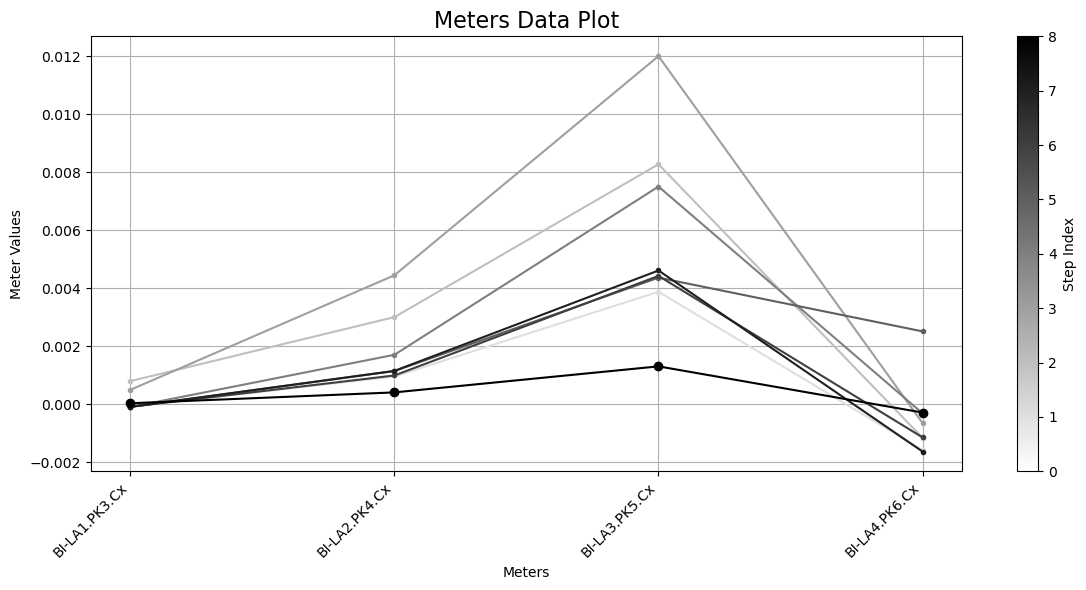

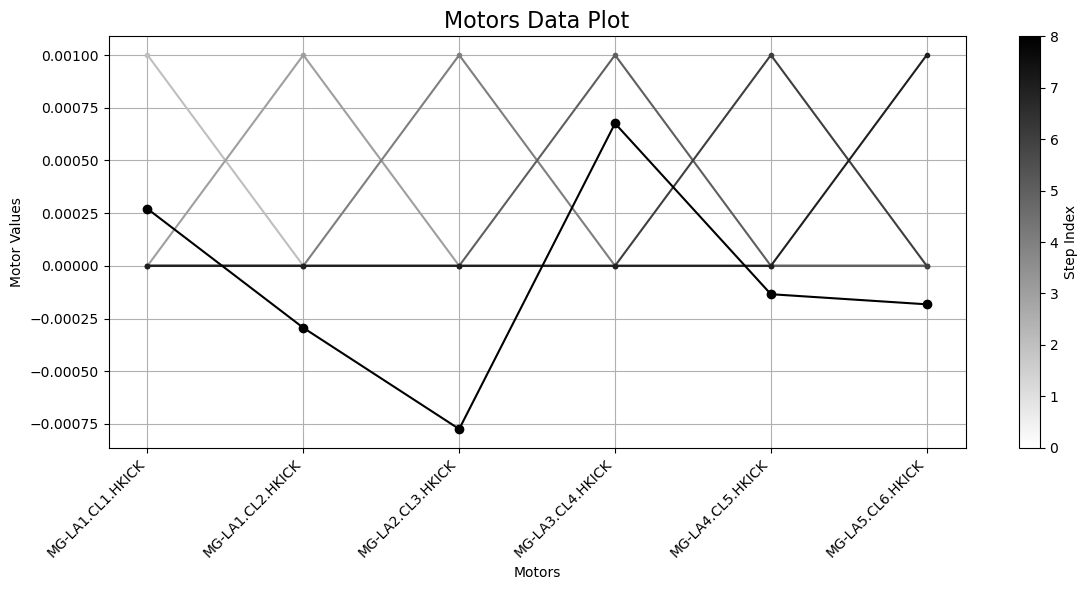

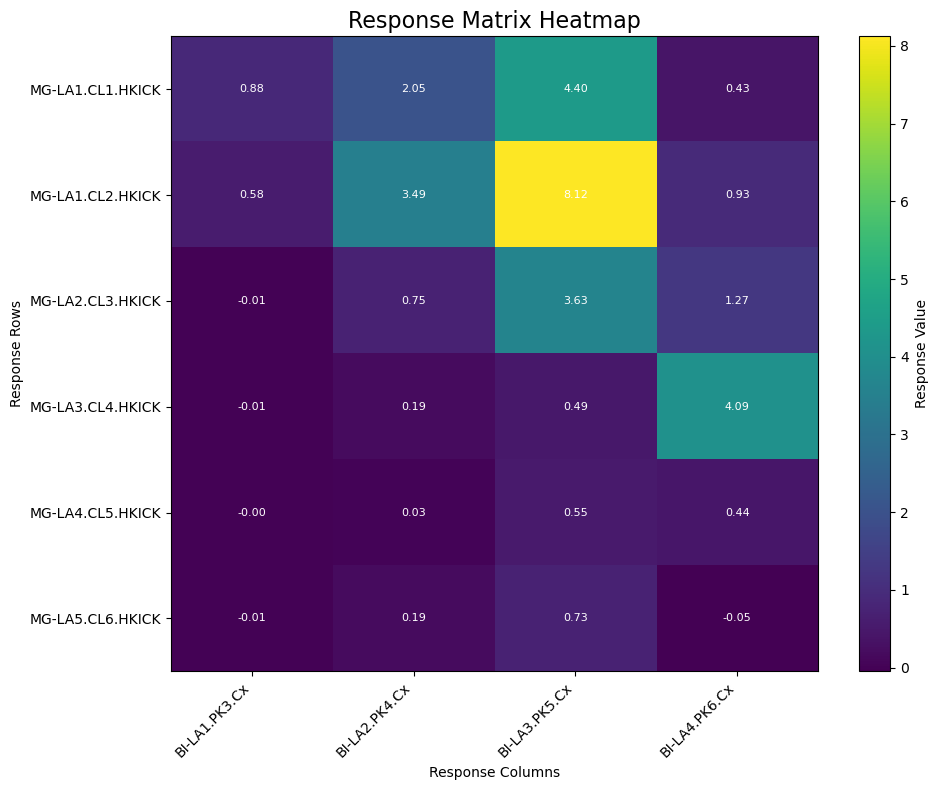

Set original motor value:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
data_scan = scan_response_measurements(
    meters=METERS, 
    motors=MOTORS, 
    get_func=add_noise(0.20)(eleget), 
    put_func=add_noise(0.05)(eleput), 
    sample_size=10,
    verify_motor=True,
    max_retries=3,
    delay=0.1,
    tolerance=0.01,
    save=False,
    dirname="",
    callback=[clear_output, plot_meters_data, plot_motors_data, plot_response_matrix], 
    save_original_motor_values=True,
)

In [4]:
data_scan

{'data': {'MG-LA1.CL1.HKICK': {0.0002704674592616657: {'BI-LA1.PK3.Cx': 4.192601477546839e-05,
    'BI-LA2.PK4.Cx': 0.0004165928741034589,
    'BI-LA3.PK5.Cx': 0.0013137894884230293,
    'BI-LA4.PK6.Cx': -0.0002780519177310904}},
  'MG-LA1.CL2.HKICK': {-0.000294030786092853: {'BI-LA1.PK3.Cx': 4.192601477546839e-05,
    'BI-LA2.PK4.Cx': 0.0004165928741034589,
    'BI-LA3.PK5.Cx': 0.0013137894884230293,
    'BI-LA4.PK6.Cx': -0.0002780519177310904}},
  'MG-LA2.CL3.HKICK': {-0.0007741857157260151: {'BI-LA1.PK3.Cx': 4.192601477546839e-05,
    'BI-LA2.PK4.Cx': 0.0004165928741034589,
    'BI-LA3.PK5.Cx': 0.0013137894884230293,
    'BI-LA4.PK6.Cx': -0.0002780519177310904}},
  'MG-LA3.CL4.HKICK': {0.0006757366079376713: {'BI-LA1.PK3.Cx': 4.192601477546839e-05,
    'BI-LA2.PK4.Cx': 0.0004165928741034589,
    'BI-LA3.PK5.Cx': 0.0013137894884230293,
    'BI-LA4.PK6.Cx': -0.0002780519177310904}},
  'MG-LA4.CL5.HKICK': {-0.00013453878478649617: {'BI-LA1.PK3.Cx': 4.192601477546839e-05,
    'BI-LA2.PK